In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("downloads/Financial Sample.xlsx - Sheet1 (1).csv")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",6/1/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,$ 260.00,$ 300.00,"$ 742,500.00","$ 111,375.00","$ 631,125.00","$ 618,750.00","$ 12,375.00",3/1/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,$ 260.00,$ 300.00,"$ 163,800.00","$ 24,570.00","$ 139,230.00","$ 136,500.00","$ 2,730.00",10/1/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,$ 5.00,$ 7.00,"$ 9,576.00","$ 1,436.40","$ 8,139.60","$ 6,840.00","$ 1,299.60",2/1/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,$ 10.00,$ 7.00,"$ 5,061.00",$ 759.15,"$ 4,301.85","$ 3,615.00",$ 686.85,4/1/2014,4,April,2014


In [3]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",6/1/2014,6,June,2014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2    Product               700 non-null    object 
 3    Discount Band         700 non-null    object 
 4   Units Sold             700 non-null    float64
 5    Manufacturing Price   700 non-null    object 
 6    Sale Price            700 non-null    object 
 7    Gross Sales           700 non-null    object 
 8    Discounts             700 non-null    object 
 9     Sales                700 non-null    object 
 10   COGS                  700 non-null    object 
 11   Profit                700 non-null    object 
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14   Month Name            700 non-null    object 
 15  Year  

In [5]:
# Remove the dollar sign and comma from the currency columns and convert them to numeric
currency_cols=[' Manufacturing Price ',' Sale Price ',' Gross Sales ',' Discounts ','  Sales ',' COGS ',' Profit ']
for col in currency_cols:
    df[col]=df[col].fillna('').astype(str).str.replace('[^\d.]', '', regex=True)
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Segment                700 non-null    object        
 1   Country                700 non-null    object        
 2    Product               700 non-null    object        
 3    Discount Band         700 non-null    object        
 4   Units Sold             700 non-null    float64       
 5    Manufacturing Price   700 non-null    float64       
 6    Sale Price            700 non-null    float64       
 7    Gross Sales           700 non-null    float64       
 8    Discounts             647 non-null    float64       
 9     Sales                700 non-null    float64       
 10   COGS                  700 non-null    float64       
 11   Profit                695 non-null    float64       
 12  Date                   700 non-null    datetime64[ns]
 13  Month

In [13]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,647.000000,7.000000e+02,700.000000,695.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,14227.586198,1.696091e+05,145475.211429,26544.380993,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1061.000000,1.592800e+04,7490.000000,4013.630000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3108.000000,3.554020e+04,22506.250000,11135.600000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,18809.250000,2.610775e+05,245607.500000,23918.500000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,23562.833079,2.367263e+05,203865.506118,41515.104658,NaN,3.377321,0.433322


In [14]:
df.isnull().sum()

Segment                   0
Country                   0
 Product                  0
 Discount Band            0
Units Sold                0
 Manufacturing Price      0
 Sale Price               0
 Gross Sales              0
 Discounts               53
  Sales                   0
 COGS                     0
 Profit                   5
Date                      0
Month Number              0
 Month Name               0
Year                      0
dtype: int64

In [15]:
df[' Discounts ']=df[' Discounts '].fillna(0)
df[' Profit ']=df[' Profit '].fillna(0)


In [16]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
Units Sold               0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [19]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


## Data Analysis and Visualization

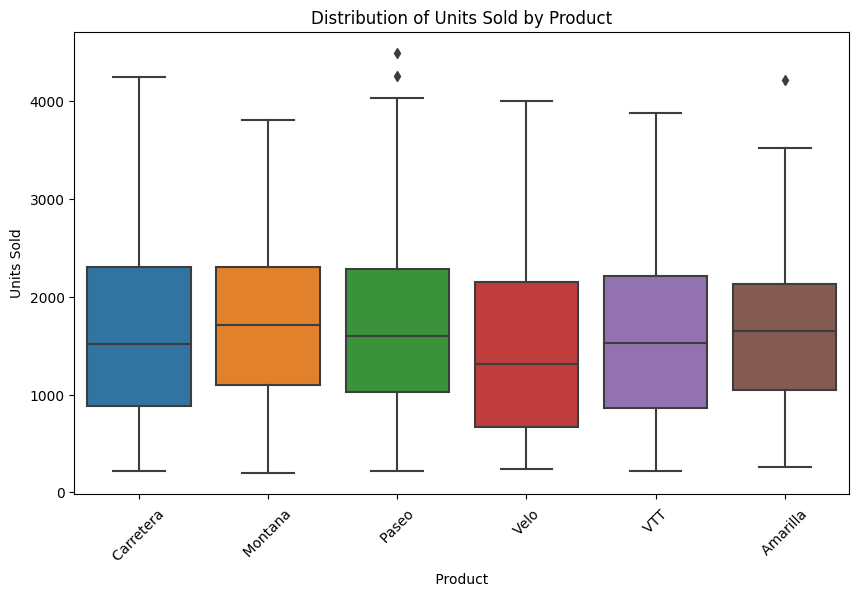

In [20]:
#  Distribution of Units Sold by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x=' Product ', y='Units Sold', data=df)
plt.title('Distribution of Units Sold by Product')
plt.xticks(rotation=45)
plt.show()

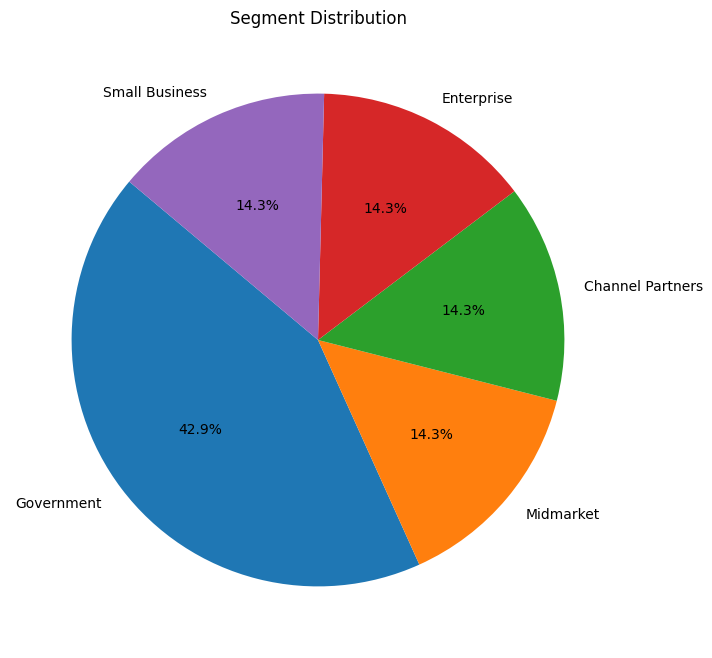

In [21]:
#PIE CHART OF SEGMENT DISTRIBUTION
plt.figure(figsize=(8, 8))
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment Distribution')
plt.show()

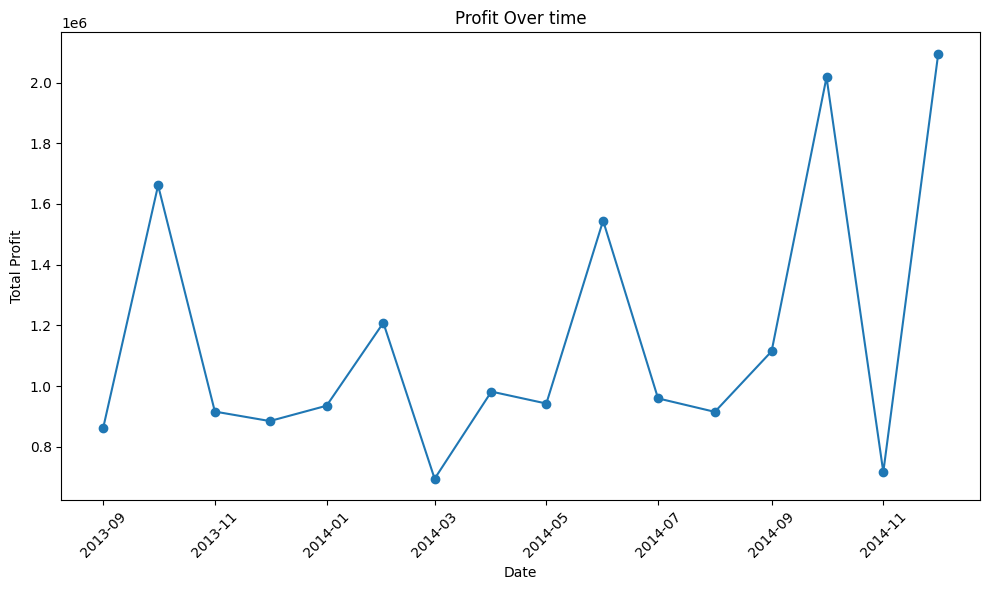

In [22]:
# Grouping data by date and calculating total profit
profit_over_time = df.groupby('Date')[' Profit '].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(profit_over_time['Date'], profit_over_time[' Profit '], marker='o')
plt.title('Profit Over time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

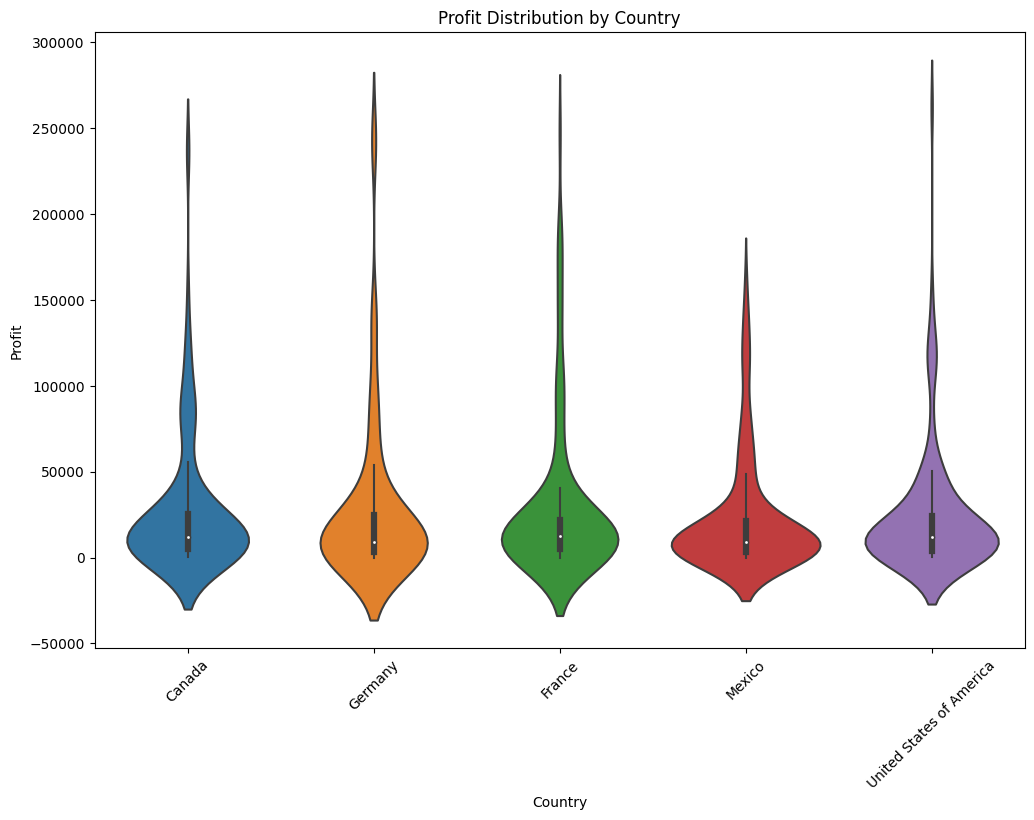

In [23]:
#Profit distribution by country
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y=' Profit ', data=df)
plt.title('Profit Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

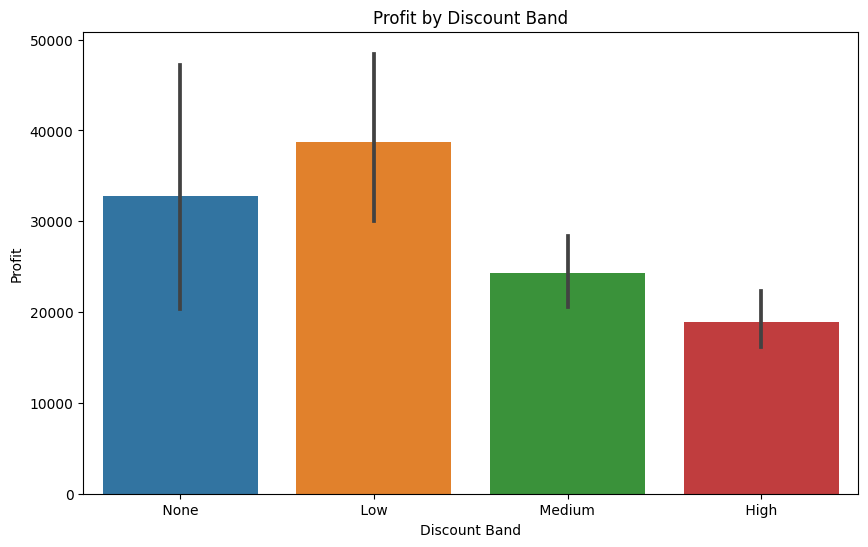

In [24]:
#Profit by discount band
plt.figure(figsize=(10, 6))
sns.barplot(x=' Discount Band ', y=' Profit ', data=df)
plt.title('Profit by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Profit')
plt.show()

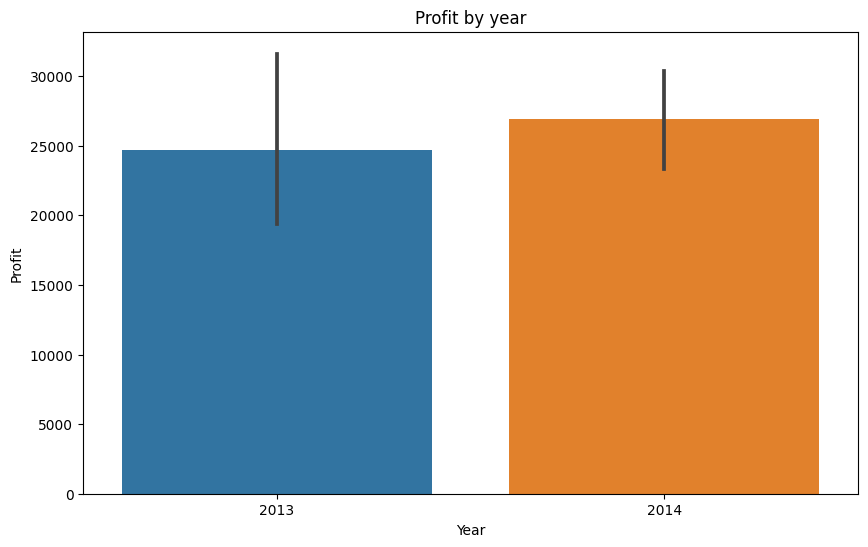

In [25]:
#Profit by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y=' Profit ', data=df)
plt.title('Profit by year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

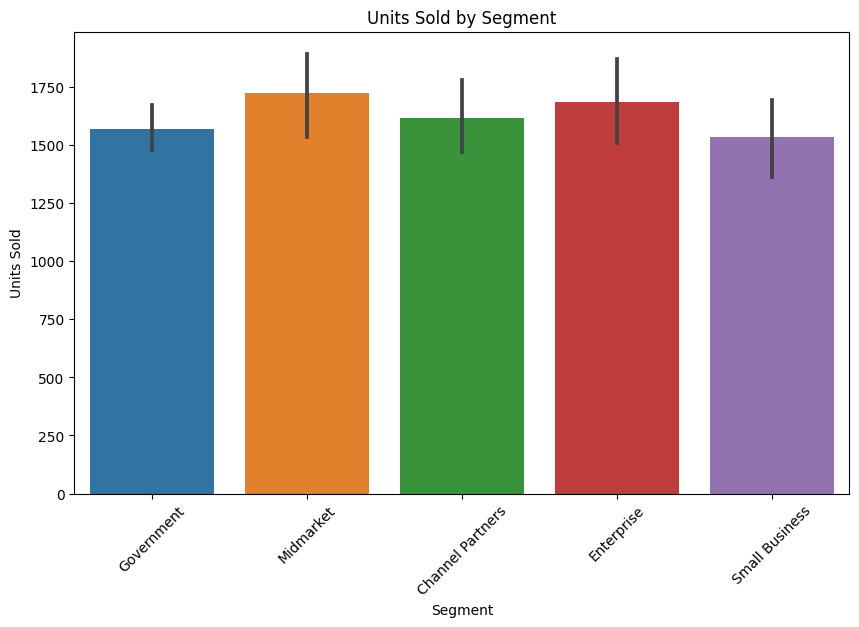

In [26]:
#Bar Plot of Units Sold by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Units Sold', data=df)
plt.title('Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

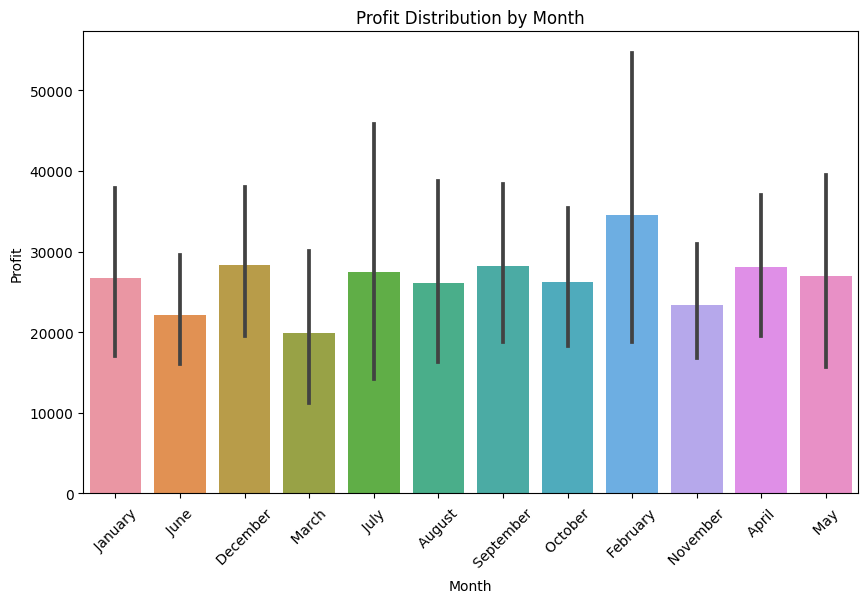

In [27]:
#Box Plot of Profit by Month
plt.figure(figsize=(10, 6))
sns.barplot(x=' Month Name ', y=' Profit ', data=df)
plt.title('Profit Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [28]:
df[' Product '].value_counts()

 Product 
 Paseo         202
 Velo          109
 VTT           109
 Amarilla       94
 Carretera      93
 Montana        93
Name: count, dtype: int64

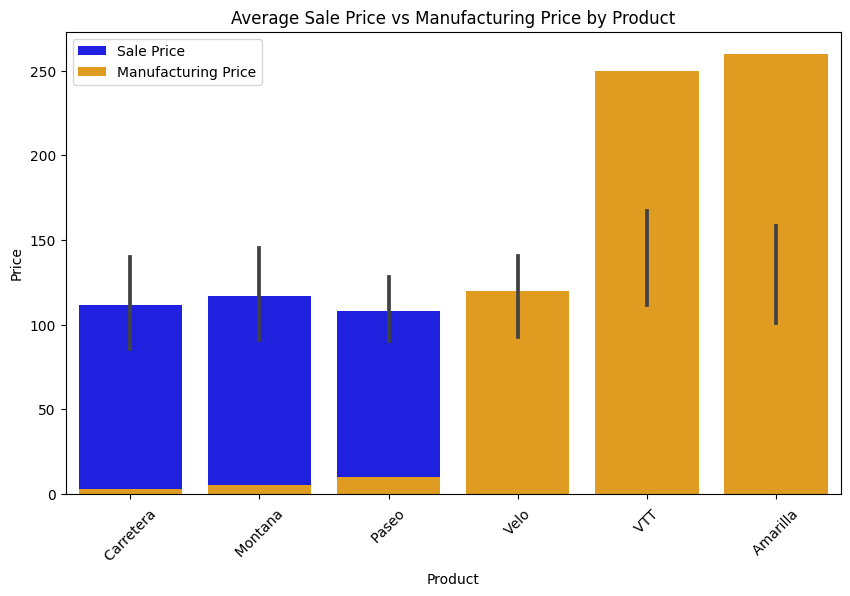

In [14]:
# Creating a bar plot of Average Sale Price vs Manufacturing Price by Product
plt.figure(figsize=(10, 6))
sns.barplot(x=' Product ', y=' Sale Price ', data=df, color='blue', label='Sale Price')
sns.barplot(x=' Product ', y=' Manufacturing Price ', data=df, color='orange', label='Manufacturing Price')
plt.title('Average Sale Price vs Manufacturing Price by Product')
plt.xlabel('Product')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

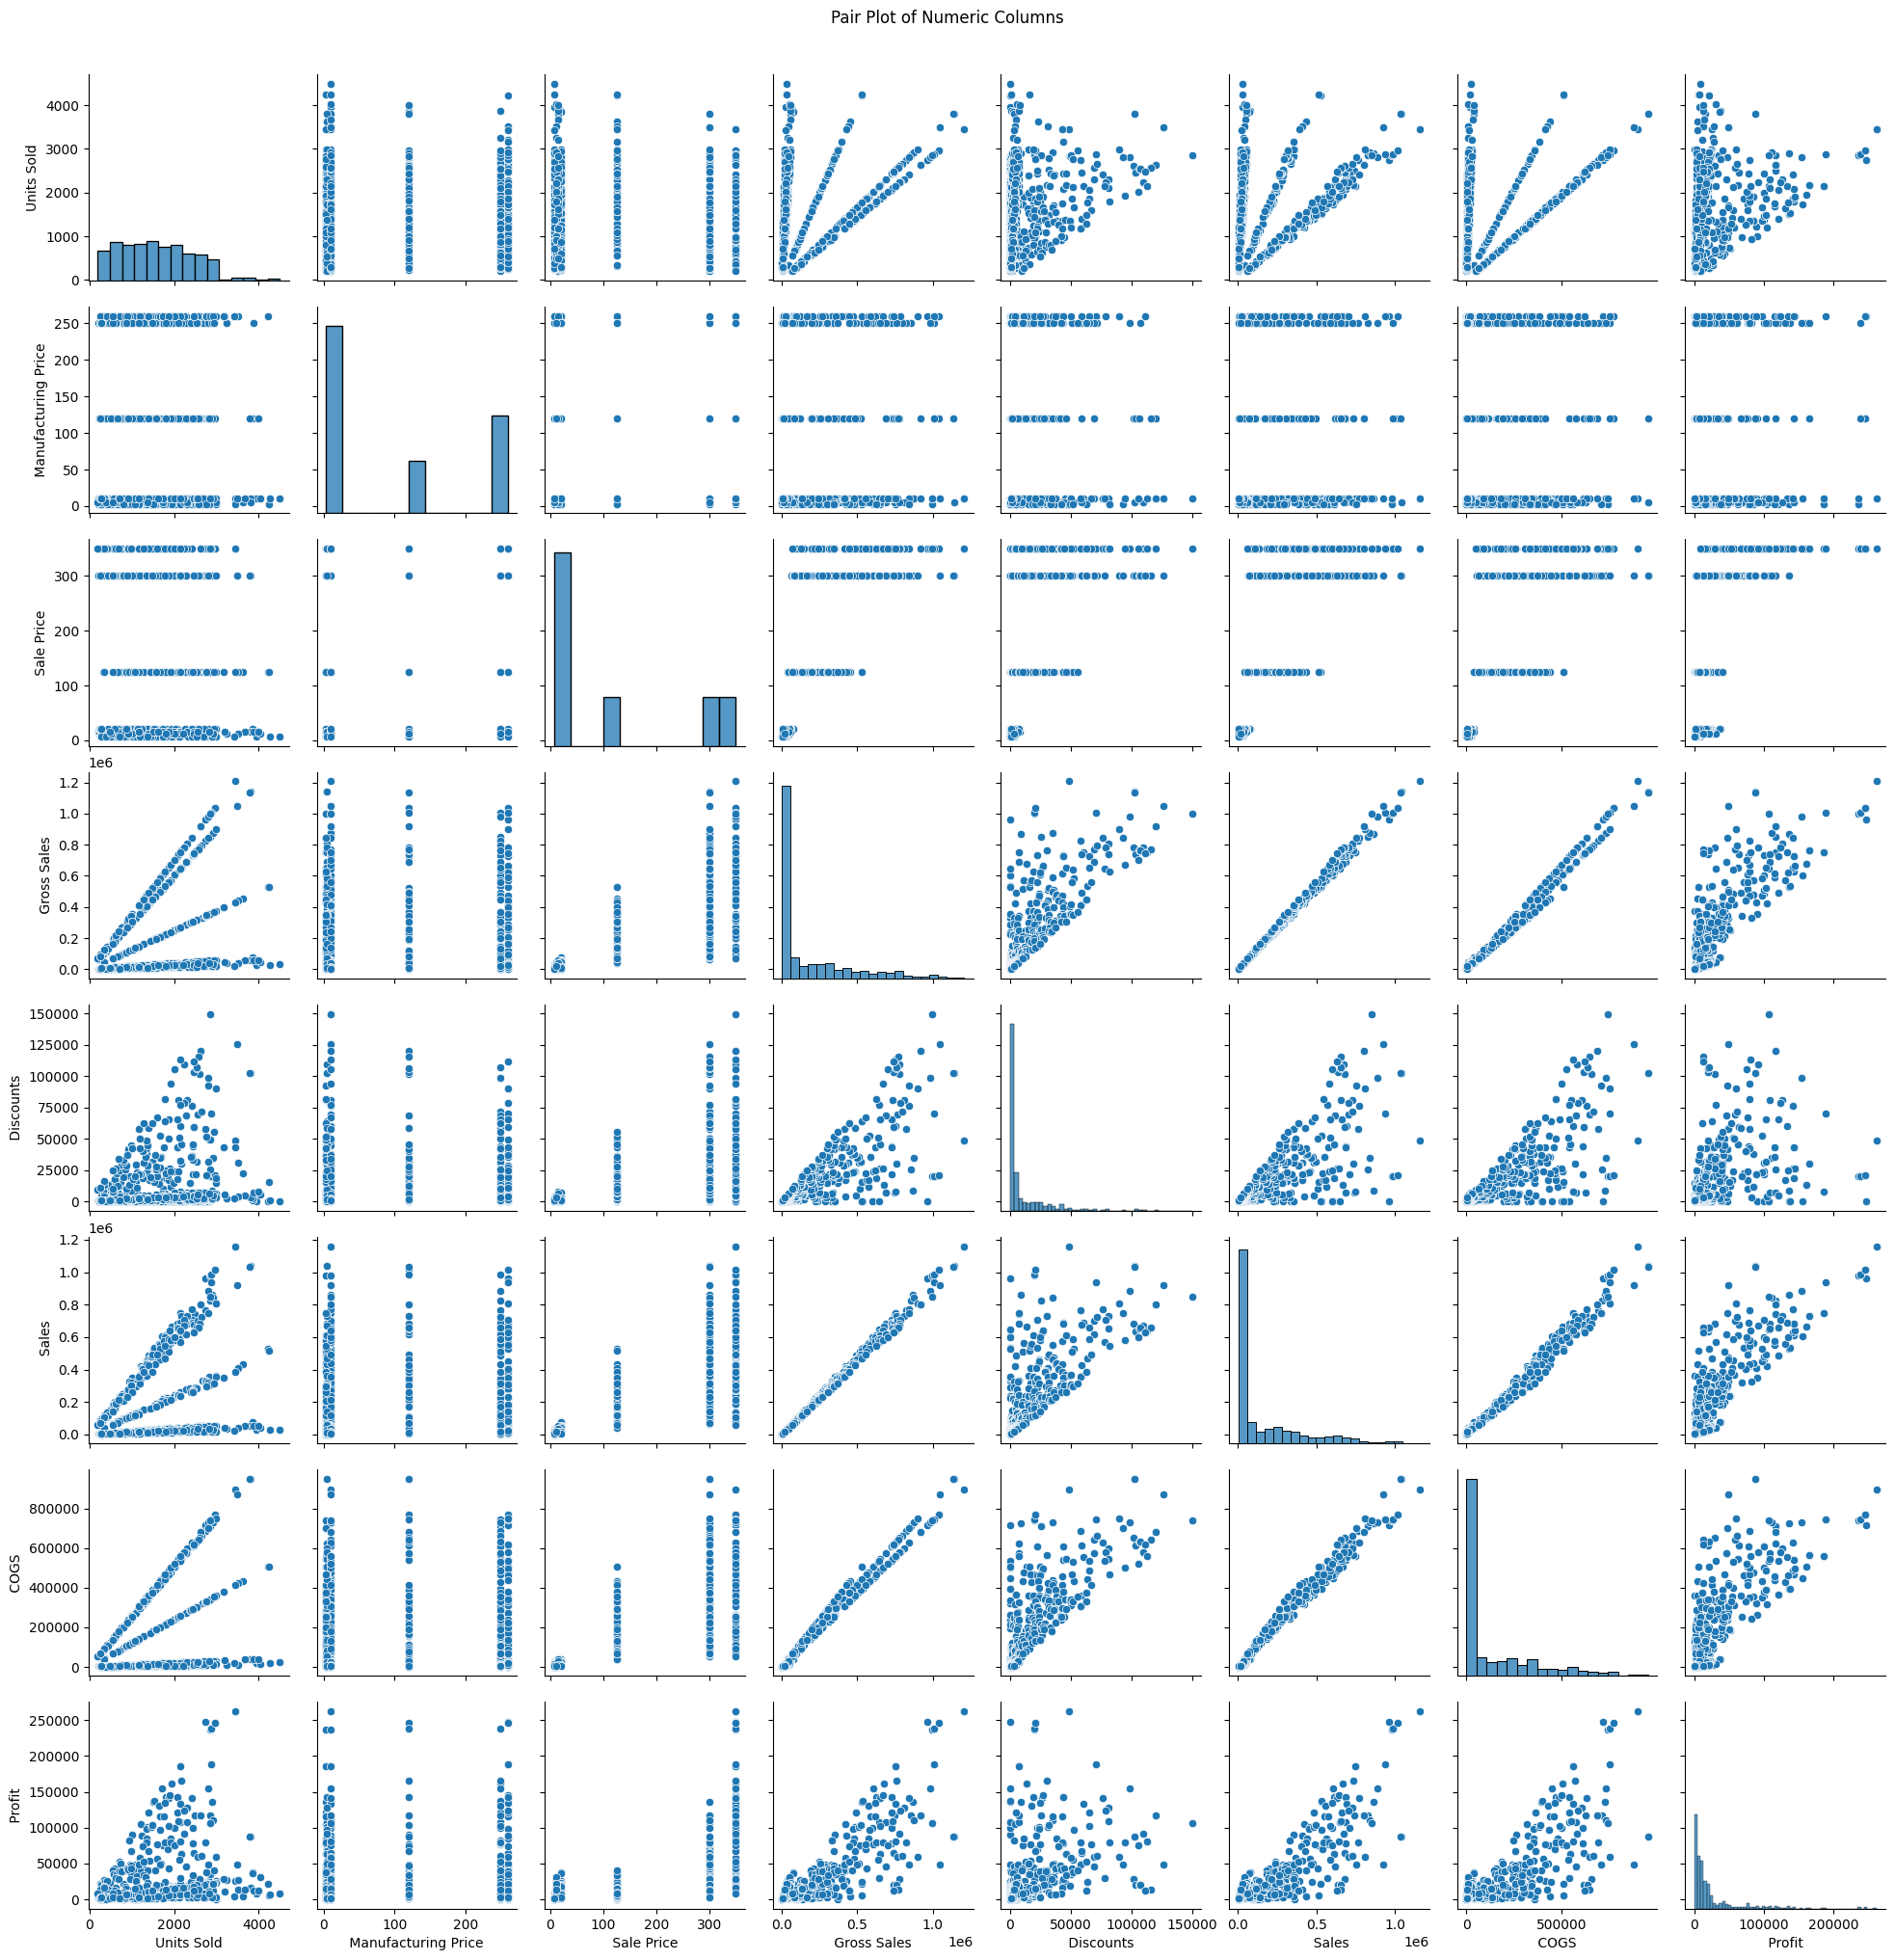

In [29]:
# Selecting a subset of numeric columns for pair plot
numeric_cols = ['Units Sold', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ',
                ' Discounts ', '  Sales ', ' COGS ', ' Profit ']
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

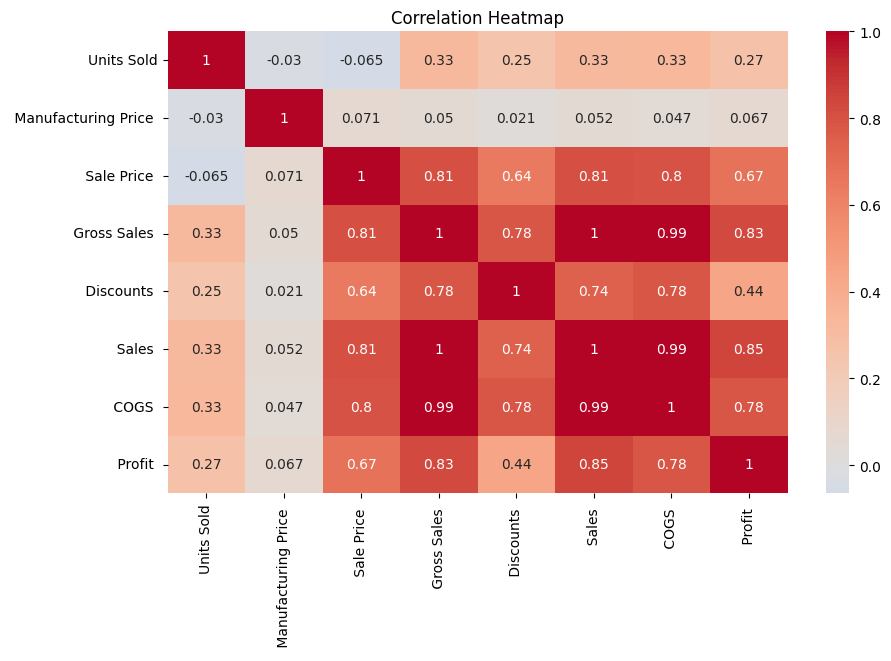

In [30]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Calculate total profit by country
profit_by_country = df.groupby('Country')[' Profit '].sum().reset_index()
profit_by_country = profit_by_country.sort_values(by=' Profit ', ascending=False)
profit_by_country

,Country,Profit
1,France,4032488.29
2,Germany,3961381.32
0,Canada,3858206.39
4,United States of America,3397345.68
3,Mexico,3198923.11


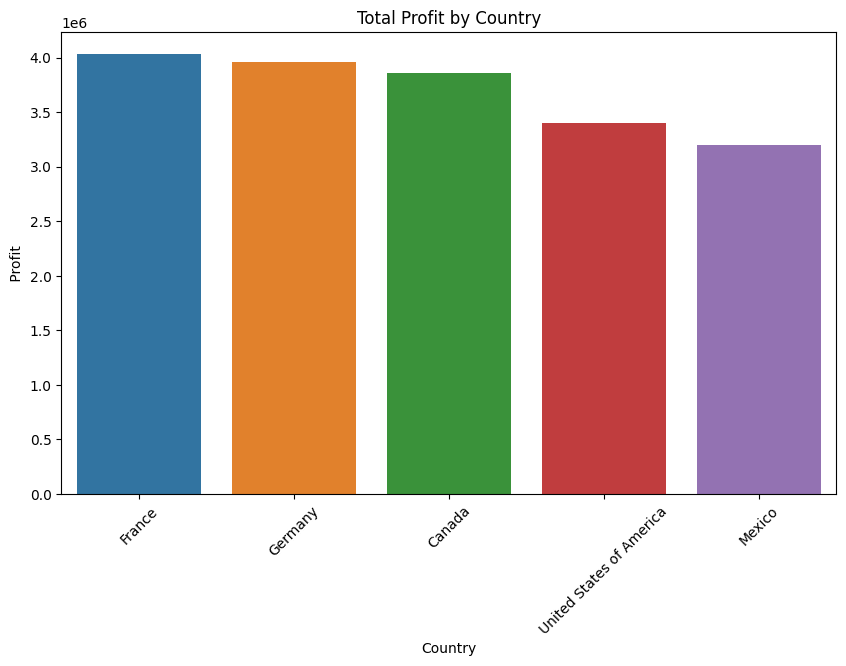

In [32]:
# Bar plot of total profit by country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y=' Profit ', data=profit_by_country)
plt.title('Total Profit by Country')
plt.xticks(rotation=45)
plt.show()

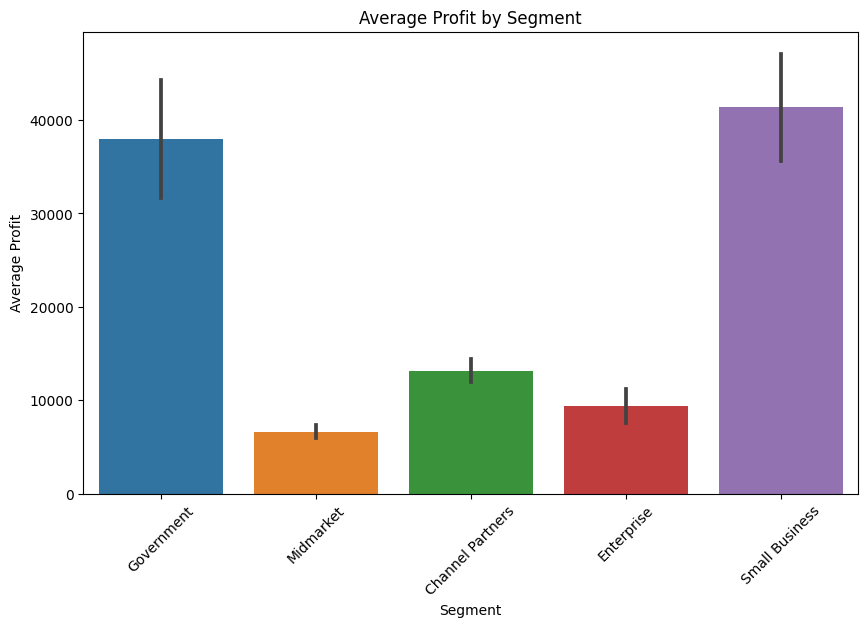

In [33]:
#Average profit by Segment
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Segment', y=' Profit ', data=df)
plt.title('Average Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

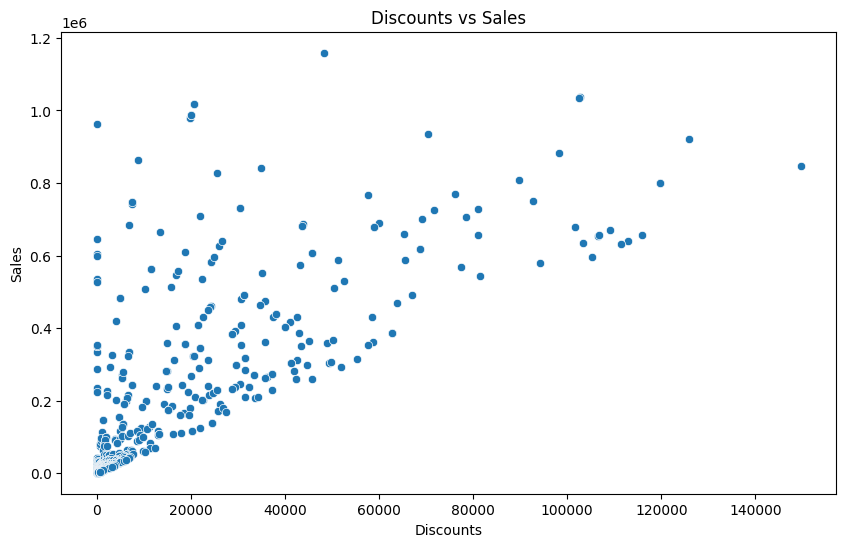

In [34]:
#Comparing discounts and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Discounts ', y='  Sales ', data=df)
plt.title('Discounts vs Sales')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.show()

In [ ]:
end:)